In [1]:
from src.latent_vector_approximator import LatentVectorApproximator
from src.utils.utils import get_training_and_validation_sets

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
X_train, Y_train, cX_train, X_val, Y_val, cX_val = get_training_and_validation_sets()

In [3]:
64*64*3

12288

In [4]:
input_dim = X_train[0].shape
latent_dim = 1280 #128
conditions_dim = cX_train[0].shape[0]

model = LatentVectorApproximator(input_dim=input_dim, latent_dim=latent_dim, conditions_dim=conditions_dim, 
    patience=10, loss_function='binary_crossentropy')

LatentVectorApproxiator initialized


In [5]:
model.train(X_train[:100], cX_train[:100], X_val[:20], cX_val[:20], pre_train_epochs=2, epochs=5, batch_size=50)

Training VAE
Epoch 1/2
2/2 [==============================] - 4s 1s/step - loss: 0.6931 - accuracy: 0.1422 - mae: 0.3442 - val_loss: 0.6928 - val_accuracy: 0.2286 - val_mae: 0.3441
Epoch 2/2
1/1 [==============================] - 0s 58ms/step
Training first Generator
Epoch 1/2
2/2 [==============================] - 4s 931ms/step - loss: 0.6931 - accuracy: 0.2344 - mae: 0.3442 - val_loss: 0.6929 - val_accuracy: 0.2344 - val_mae: 0.3441
Epoch 2/2
2/2 [==============================] - 1s 566ms/step - loss: 0.6928 - accuracy: 0.2344 - mae: 0.3440 - val_loss: 0.6926 - val_accuracy: 0.2344 - val_mae: 0.3438
Training IPvae
Epoch 1/2
2/2 [==============================] - 6s 619ms/step - loss: 1.3856 - ip_vae_decoder_loss: 0.6929 - ip_vae_decoder_1_loss: 0.6927 - ip_vae_decoder_accuracy: 0.0000e+00 - ip_vae_decoder_mae: 0.8949 - ip_vae_decoder_1_accuracy: 0.1900 - ip_vae_decoder_1_mae: 1.0010 - val_loss: 1.3836 - val_ip_vae_decoder_loss: 0.6922 - val_ip_vae_decoder_1_loss: 0.6914 - val_ip_vae

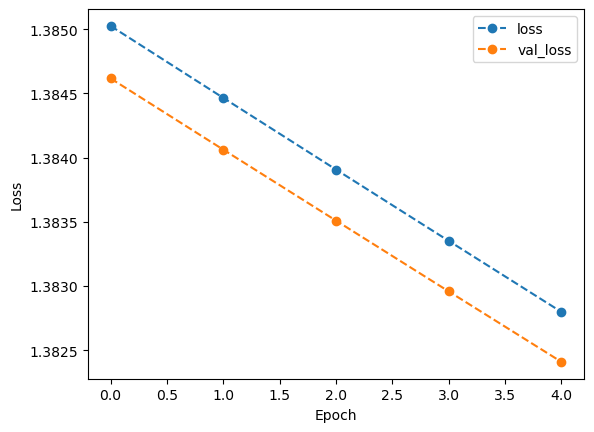

In [6]:
model.visualize_loss()

1/1 [==============================] - 0s 284ms/step


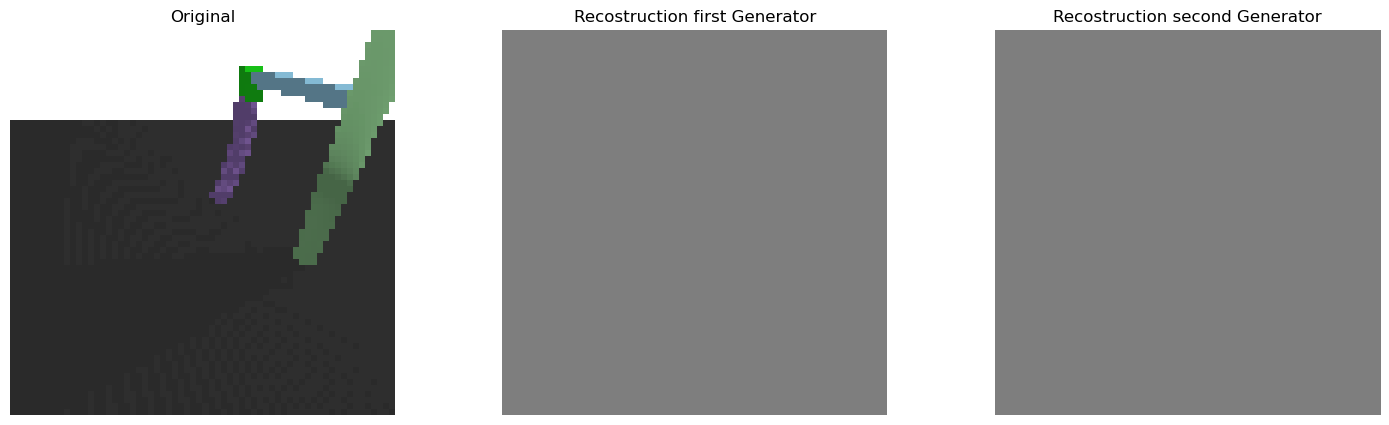

In [8]:
model.visualize_recostruction(X_val[0], cX_val[0])

1/1 [==============================] - 0s 39ms/step


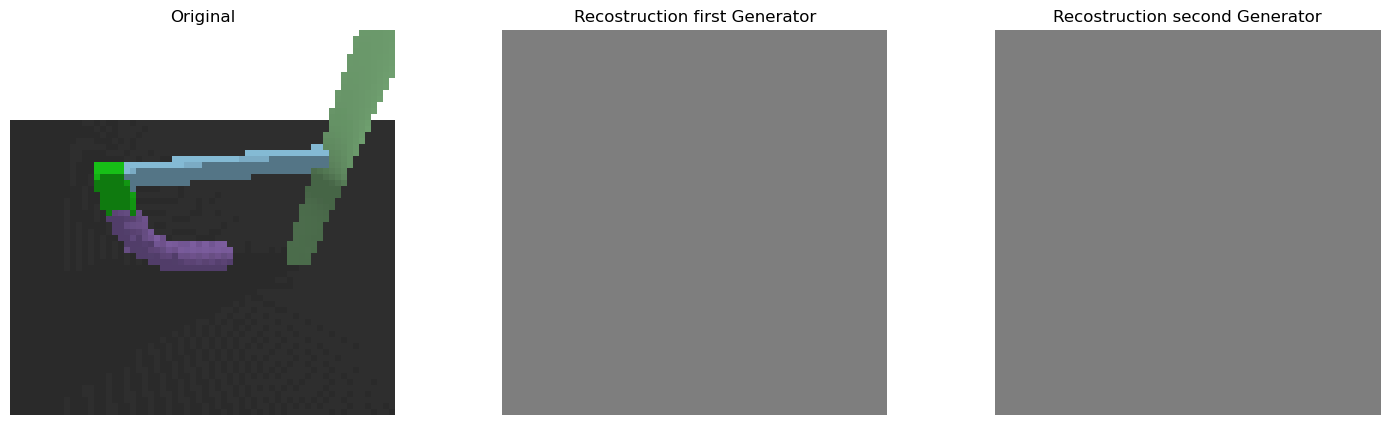

In [10]:
model.visualize_recostruction(X_val[600], cX_val[600])

In [11]:
recostruction1, recostruction2 = model.recostruct(X_val[0], cX_val[0])

from tensorflow.keras.metrics import MeanSquaredError

mse = MeanSquaredError()
print(mse(X_val[0], recostruction1).numpy())
print(mse(X_val[0], recostruction2).numpy())

1/1 [==============================] - 0s 38ms/step
0.12505816
0.12505816
